<a href="https://colab.research.google.com/github/gaurinaik22/CMPE257-Fall23-Gauri-Naik/blob/take-home-exam/Take_Home_Exam_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1

In [825]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [826]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [827]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [828]:
syntheticDataset  = pd.read_csv('/content/drive/MyDrive/ML/synthetic_dataset.csv', sep=',', header=0)

In [829]:
syntheticDataset.head()

,x1,x2,y
0,3.989474,6.935317,1
1,-6.248354,-8.750153,-1
2,-1.419806,-3.427461,-1
3,-9.266949,7.083503,1
4,-8.487555,-4.916374,-1


In [830]:
syntheticDataset.columns

Index(['x1', 'x2', 'y'], dtype='object')

In [831]:
syntheticDataset.shape

(50, 3)

In [832]:
syntheticTestDataset  = pd.read_csv('/content/drive/MyDrive/ML/synthetic_test_dataset.csv', sep=',', header=0)

In [833]:
syntheticTestDataset.head()

,x1,x2,y
0,-1.800591,2.131077,-1.0
1,-5.116260,6.153548,-1.0
2,1.040485,0.889453,-1.0
3,1.796096,-1.008297,-1.0
4,-4.039528,7.832167,-1.0


In [834]:
syntheticTestDataset.columns

Index(['x1', 'x2', 'y'], dtype='object')

In [835]:
syntheticTestDataset.shape

(500, 3)

In [836]:
syntheticDataset.insert(0,'x0',[1]*syntheticDataset.shape[0])


In [837]:
syntheticTestDataset.insert(0,'x0',[1]*syntheticTestDataset.shape[0])

In [838]:
syntheticDataset.head()

,x0,x1,x2,y
0,1,3.989474,6.935317,1
1,1,-6.248354,-8.750153,-1
2,1,-1.419806,-3.427461,-1
3,1,-9.266949,7.083503,1
4,1,-8.487555,-4.916374,-1


In [839]:
syntheticTestDataset.head()

,x0,x1,x2,y
0,1,-1.800591,2.131077,-1.0
1,1,-5.116260,6.153548,-1.0
2,1,1.040485,0.889453,-1.0
3,1,1.796096,-1.008297,-1.0
4,1,-4.039528,7.832167,-1.0


In [840]:
X_train = syntheticDataset[['x1', 'x2']].values
y_train = syntheticDataset['y'].values

In [841]:
X_test = syntheticTestDataset[['x1', 'x2']].values
y_test = syntheticTestDataset['y'].values

In [842]:
w = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

In [843]:
w

array([0.05410435, 0.03261522])

In [844]:
predict_y = X_train.dot(w)
err = mean_squared_error(y_train, predict_y)

Training Error (MSE)

In [845]:
err

0.8671944660331731

In [846]:
predict_y = X_test.dot(w)
validation_error = mean_squared_error(y_test, predict_y)

Validation Error (MSE)

In [847]:
validation_error


0.8409666909985727

In [848]:
positive = syntheticTestDataset[syntheticTestDataset['y'] == 1]
negative = syntheticTestDataset[syntheticTestDataset['y'] == -1]

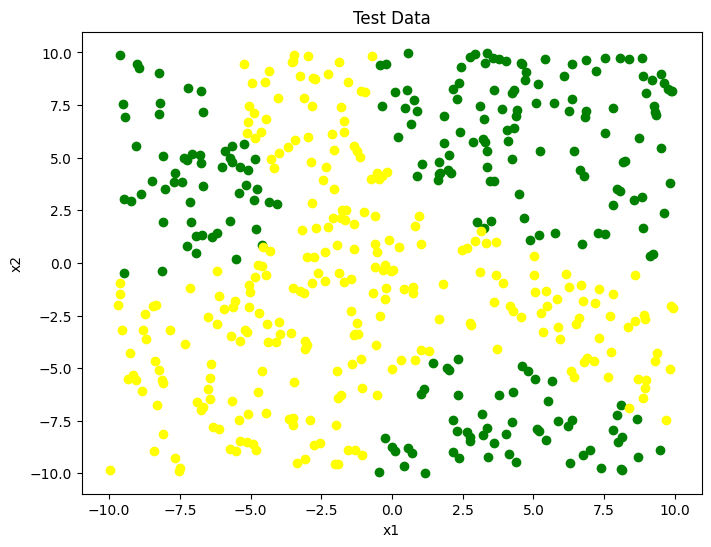

In [849]:
plt.figure(figsize=(8, 6))
plt.scatter(positive['x1'], positive['x2'], color='green', label='Class 1 (y=1)')
plt.scatter(negative['x1'], negative['x2'], color='yellow', label='Class -1 (y=-1)')

plt.title('Test Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [850]:
def plotting_Decision_Boundary(syntheticDataset, w):

    plt.figure(figsize=(8, 6))
    plt.scatter(positive['x1'], positive['x2'], color='green', label='Class 1 (y=1)')
    plt.scatter(negative['x1'], negative['x2'], color='yellow', label='Class -1 (y=-1)')

    plt.title('Decision Boundary - Linear Regression')
    plt.xlabel('x1')
    plt.ylabel('x2')

    slope = -w[0] / w[1]
    inter = 0
    x1 = np.linspace(-6, 6, 100)
    x2 = slope * x1 + inter
    plt.plot(x1, x2, color='black', linewidth=1)
    plt.show()


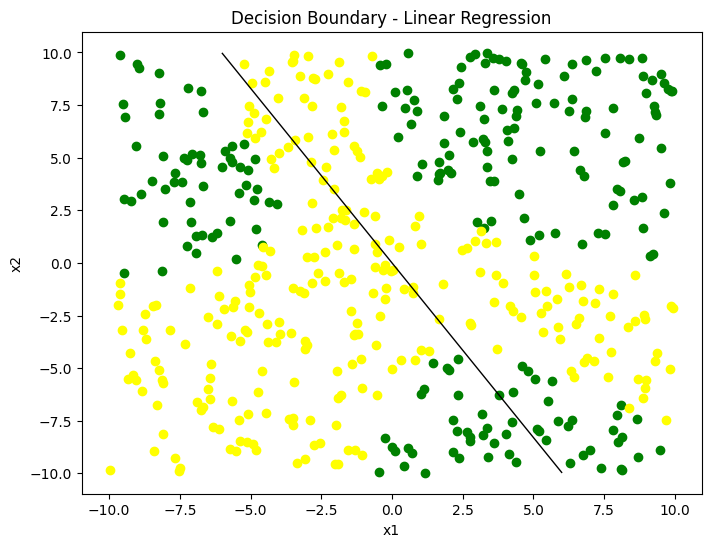

In [851]:
plotting_Decision_Boundary(syntheticDataset, w)

In [852]:
X = syntheticDataset.drop('y', axis=1)
y = syntheticDataset['y']

In [853]:
def plot_decision_boundary_higher_order(X, y, degree):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    x1_vals = np.linspace(-10, 10, 100)
    x2_vals = np.linspace(-10, 10, 100)

    x1, x2 = np.meshgrid(x1_vals, x2_vals)

    boundary = poly.fit_transform(np.c_[x1.ravel(), x2.ravel()])
    decision_boundary = model.predict(boundary).reshape(x1.shape)
    return decision_boundary, x1, x2

In [854]:
for i in range (1,5):
    decision_boundary, x1, x2 = plot_decision_boundary_higher_order( X_test, y_test, i)


In [855]:
positive = X_test[y_test == 1]
negative = X_test[y_test == -1]

<ipython-input-856-d28f6a7cb325>:5: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x1, x2, decision_boundary, levels=[0], colors='black', linestyles='solid', label=f'Decision Boundary (Order {degree})')


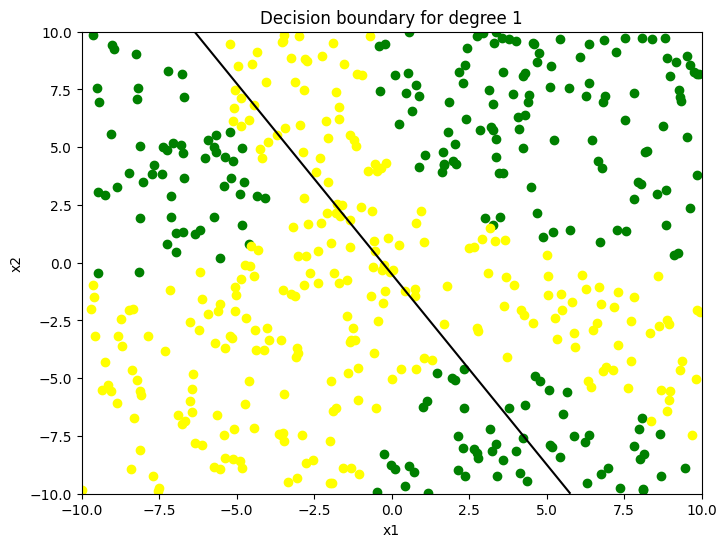

In [856]:
decision_boundary, x1, x2 = plot_decision_boundary_higher_order( X_test, y_test, 1)
plt.figure(figsize=(8, 6))
plt.scatter(positive[:, 0], positive[:, 1], color='green', label='Class 1 (y=1)')
plt.scatter(negative[:, 0], negative[:, 1], color='yellow', label='Class -1 (y=-1)')
plt.contour(x1, x2, decision_boundary, levels=[0], colors='black', linestyles='solid', label=f'Decision Boundary (Order {degree})')
plt.title('Decision boundary for degree {}'.format(1))
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

<ipython-input-857-ea3b2dc7e008>:5: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x1, x2, decision_boundary, levels=[0], colors='black', linestyles='solid', label=f'Decision Boundary (Order {degree})')


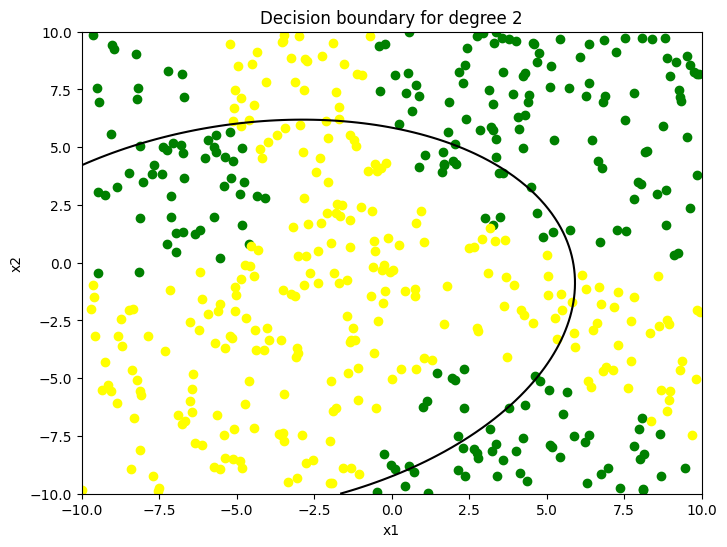

In [857]:
decision_boundary, x1, x2 = plot_decision_boundary_higher_order( X_test, y_test, 2)
plt.figure(figsize=(8, 6))
plt.scatter(positive[:, 0], positive[:, 1], color='green', label='Class 1 (y=1)')
plt.scatter(negative[:, 0], negative[:, 1], color='yellow', label='Class -1 (y=-1)')
plt.contour(x1, x2, decision_boundary, levels=[0], colors='black', linestyles='solid', label=f'Decision Boundary (Order {degree})')
plt.title('Decision boundary for degree {}'.format(2))
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

<ipython-input-858-e82297ff5d9b>:5: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x1, x2, decision_boundary, levels=[0], colors='black', linestyles='solid', label=f'Decision Boundary (Order {degree})')


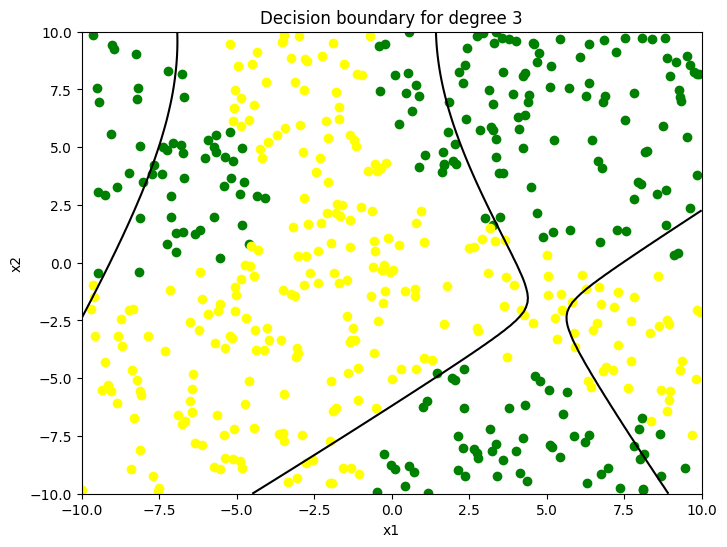

In [858]:
decision_boundary, x1, x2 = plot_decision_boundary_higher_order( X_test, y_test, 3)
plt.figure(figsize=(8, 6))
plt.scatter(positive[:, 0], positive[:, 1], color='green', label='Class 1 (y=1)')
plt.scatter(negative[:, 0], negative[:, 1], color='yellow', label='Class -1 (y=-1)')
plt.contour(x1, x2, decision_boundary, levels=[0], colors='black', linestyles='solid', label=f'Decision Boundary (Order {degree})')
plt.title('Decision boundary for degree {}'.format(3))
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

<ipython-input-859-663edb224d05>:5: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x1, x2, decision_boundary, levels=[0], colors='black', linestyles='solid', label=f'Decision Boundary (Order {degree})')


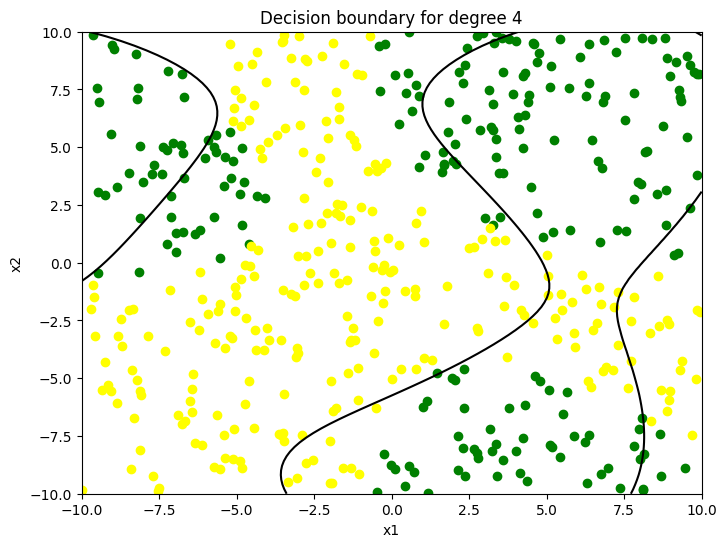

In [859]:
decision_boundary, x1, x2 = plot_decision_boundary_higher_order( X_test, y_test, 4)
plt.figure(figsize=(8, 6))
plt.scatter(positive[:, 0], positive[:, 1], color='green', label='Class 1 (y=1)')
plt.scatter(negative[:, 0], negative[:, 1], color='yellow', label='Class -1 (y=-1)')
plt.contour(x1, x2, decision_boundary, levels=[0], colors='black', linestyles='solid', label=f'Decision Boundary (Order {degree})')
plt.title('Decision boundary for degree {}'.format(4))
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [860]:
train_errors = []
val_errors = []

for degree in [1, 2, 3, 4]:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_mse)
    val_errors.append(val_mse)
    print(f"Degree-{degree} Training MSE: {train_mse}")
    print(f"Degree-{degree} Testing MSE: {val_mse}\n")


Degree-1 Training MSE: 0.8669392995099426
Degree-1 Testing MSE: 0.8440180255525042

Degree-2 Training MSE: 0.6712559029286338
Degree-2 Testing MSE: 0.752793662214335

Degree-3 Training MSE: 0.2536236701886392
Degree-3 Testing MSE: 0.6867549907072039

Degree-4 Training MSE: 0.1737045044469892
Degree-4 Testing MSE: 0.5697646871091975



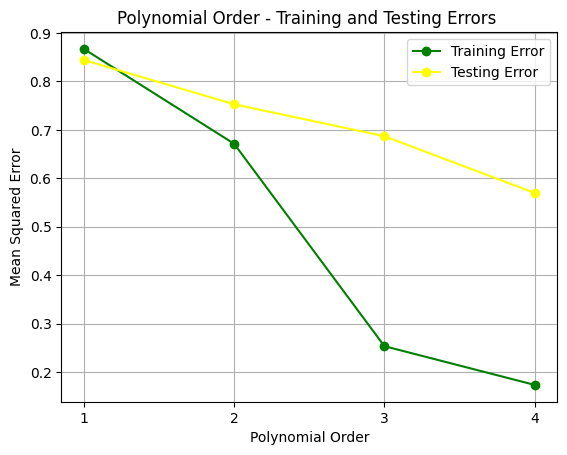

In [861]:
degrees = [1,2,3,4]
plt.plot(degrees, train_errors, label='Training Error', marker='o', color='green')
plt.plot(degrees, val_errors, label='Testing Error', marker='o', color='yellow')
plt.xlabel('Polynomial Order')
plt.ylabel('Mean Squared Error')
plt.title('Polynomial Order - Training and Testing Errors ')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()

Observing the pattern in the training and testing Mean Squared Error (MSE) across various polynomial degrees, we notice the following trends:

- Initially, with an increase in the polynomial degree, there is a noticeable decrease in both training and testing MSE.
- The model with a first-degree polynomial exhibits the highest MSE for both training and testing data. This high error rate suggests that a simple linear model is insufficient for the dataset, leading to underfitting.
- Progressing from a first-degree to a fourth-degree polynomial, there's a general downward trend in the MSE for both training and testing datasets. This trend is indicative of enhanced model performance and a more accurate fit to the data.

Given these observations, the fourth-degree polynomial model emerges as the preferred choice due to its lowest testing error. This choice reflects the model's ability to effectively capture and predict the data's complexity while minimizing error rates.